In [1]:
from hyperts import HyperTS

from hyperts.utils import consts, get_tool_box
from hyperts.datasets import load_basic_motions

#### 1. Load Data

In [2]:
df = load_basic_motions()

#### 2. Look at the data

In [3]:
df.head()

,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,target
0,0 0.079106 1 0.079106 2 -0.903497 3...,0 0.394032 1 0.394032 2 -3.666397 3...,0 0.551444 1 0.551444 2 -0.282844 3...,0 0.351565 1 0.351565 2 -0.095881 3...,0 0.023970 1 0.023970 2 -0.319605 3...,0 0.633883 1 0.633883 2 0.972131 3...,standing
1,0 0.377751 1 0.377751 2 2.952965 3...,0 -0.610850 1 -0.610850 2 0.970717 3...,0 -0.147376 1 -0.147376 2 -5.962515 3...,0 -0.103872 1 -0.103872 2 -7.593275 3...,0 -0.109198 1 -0.109198 2 -0.697804 3...,0 -0.037287 1 -0.037287 2 -2.865789 3...,standing
2,0 -0.813905 1 -0.813905 2 -0.424628 3...,0 0.825666 1 0.825666 2 -1.305033 3...,0 0.032712 1 0.032712 2 0.826170 3...,0 0.021307 1 0.021307 2 -0.372872 3...,0 0.122515 1 0.122515 2 -0.045277 3...,0 0.775041 1 0.775041 2 0.383526 3...,standing
3,0 0.289855 1 0.289855 2 -0.669185 3...,0 0.284130 1 0.284130 2 -0.210466 3...,0 0.213680 1 0.213680 2 0.252267 3...,0 -0.314278 1 -0.314278 2 0.018644 3...,0 0.074574 1 0.074574 2 0.007990 3...,0 -0.079901 1 -0.079901 2 0.237040 3...,standing
4,0 -0.123238 1 -0.123238 2 -0.249547 3...,0 0.379341 1 0.379341 2 0.541501 3...,0 -0.286006 1 -0.286006 2 0.208420 3...,0 -0.098545 1 -0.098545 2 -0.023970 3...,0 0.058594 1 0.058594 2 0.175783 3...,0 -0.074574 1 -0.074574 2 0.114525 3...,standing


#### 3. Simple EDA

In [4]:
df.target.unique()

array(['standing', 'running', 'walking', 'badminton'], dtype=object)

In [5]:
df.shape, df.Var_1.iloc[0].shape

((80, 7), (100,))

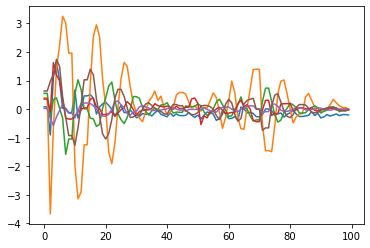

In [6]:
for i in range(6):
    df[f'Var_{i+1}'].iloc[0].plot()

#### From the above data, we can find that the problem is a 4 classification task, ['standing', 'running', 'walking', 'badminton'], 80 samples, 6 variables, ['Var_1', 'Var_2', 'Var_3', 'Var_4', 'Var_5', 'Var_6', ], and each cell contains a time serie with a length of 100.

#### 4. Split train_data and test_data

In [7]:
tb = get_tool_box(df)
train_df, test_df = tb.random_train_test_split(df, test_size=0.2)

#### 5. Configure some parameters and initialize HyperTS. For details, see HyperTS comments.

In [8]:
model = HyperTS(train_data=train_df.copy(),
                mode='dl',
                target='target',
                task=consts.Task_CLASSIFICATION,
                reward_metric=consts.Metric_ACCURACY,
                optimize_direction=consts.OptimizeDirection_MAXIMIZE,
                dl_gpu_usage_strategy=0, # CPU
               )

#### 6. Fit model (Train)

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(64, 6)","(64,)",None,None,None,multivariate-multiclass(4)


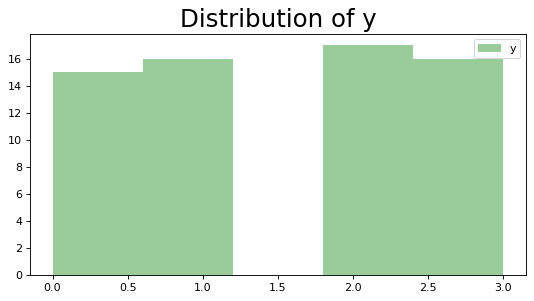

## Data Preprocessing

### Initliazed parameters

,key,value
0,cv,False
1,data_cleaner_args,{'drop_label_nan_rows': True}
2,name,data_preprocessing


### Fitted parameters

,key,value
0,input_features,"[Var_1, Var_2, Var_3, Var_4, Var_5, Var_6]"
1,X_train.shape,"(51, 6)"
2,y_train.shape,"(51,)"
3,X_eval.shape,"(13, 6)"
4,y_eval.shape,"(13,)"
5,X_test.shape,None


### Elapsed

* 0.023 seconds

## Space Searching

### Initliazed parameters

,key,value
0,name,space_searching


#### Experiment Settings:

HyperTS(searcher=EvolutionSearcher(space_fn=DLClassificationSearchSpace(task='multivariate-multiclass', metrics=['accuracy']), population_size=30, sample_size=10, regularized=True, optimize_direction='max', random_state=RandomState(MT19937) at 0x27D56C1C678), task='multivariate-multiclass', mode='dl', callbacks=[EarlyStoppingCallback(max_no_improvement_trials=10, mode='max', time_limit=3600), NotebookCallback(), ProgressiveCallback()], discriminator=OncePercentileDiscriminator(percentile=50, history=TrialHistory(direction='max'), optimize_direction='max'), clear_cache=None)

,X,y,X_eval,y_eval,cv,num_folds,max_trials,fit_kwargs
0,"(51, 6)","(51,)","(13, 6)","(13,)",False,3,3,(eval_set)


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,3,0.769231,1,1.0,132.563251,3,3


#### Best Trial:

key,value
signature,7bfcf5171dafad3c82f465f4f2f78705
vectors,"[1, 0, 2, 1, 0, 0, 0, 0]"
0-estimator_options.hp_or,1
1-Module_LSTNetGeneralEstimator_1.x_scale,z_score
2-Module_LSTNetGeneralEstimator_1.rnn_type,lstm
3-Module_LSTNetGeneralEstimator_1.cnn_filters,32
4-Module_LSTNetGeneralEstimator_1.kernel_size,3
5-Module_LSTNetGeneralEstimator_1.rnn_units,8
6-Module_LSTNetGeneralEstimator_1.rnn_layers,2
7-Module_LSTNetGeneralEstimator_1.drop_rate,0.0


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,1,1.000000,42.260483,"[1, 0, 2, 1, 0, 0, 0, 0]"
1,3,0.769231,38.668229,"[1, 0, 1, 0, 2, 3, 1, 0]"
2,2,0.692308,51.459622,"[1, 1, 1, 0, 0, 3, 1, 1]"


search:   0%|          | 0/3 [00:00<?, ?it/s]

Model: "LSTNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_continuous_all (Input  [(None, 100, 6)]         0         
 Layer)                                                          
                                                                 
 conv1d (SeparableConv1D)    (None, 98, 32)            242       
                                                                 
 conv1d_dropout (Dropout)    (None, 98, 32)            0         
                                                                 
 lstm_0 (LSTM)               (None, 98, 8)             1312      
                                                                 
 lstm_0_dropout (Dropout)    (None, 98, 8)             0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                            

20/20 [==============================] - 7s 129ms/step - loss: 1.4027 - acc: 0.2500 - val_loss: 1.4170 - val_acc: 0.0909 - lr: 0.0010
Epoch 2/60
20/20 [==============================] - 2s 77ms/step - loss: 1.3648 - acc: 0.3000 - val_loss: 1.3930 - val_acc: 0.0909 - lr: 0.0010
Epoch 3/60
20/20 [==============================] - 2s 80ms/step - loss: 1.2634 - acc: 0.3500 - val_loss: 1.2050 - val_acc: 0.4545 - lr: 0.0010
Epoch 4/60
20/20 [==============================] - 2s 79ms/step - loss: 0.9393 - acc: 0.6000 - val_loss: 0.8154 - val_acc: 0.4545 - lr: 0.0010
Epoch 5/60
20/20 [==============================] - 2s 79ms/step - loss: 0.8787 - acc: 0.4000 - val_loss: 1.5756 - val_acc: 0.3636 - lr: 0.0010
Epoch 6/60
20/20 [==============================] - 2s 79ms/step - loss: 1.1365 - acc: 0.4250 - val_loss: 0.9994 - val_acc: 0.3636 - lr: 0.0010
Epoch 7/60
20/20 [==============================] - 2s 80ms/step - loss: 0.8223 - acc: 0.5750 - val_loss: 1.0065 - val_acc: 0.4545 - lr: 0.0010
Ep

Epoch 14/60
20/20 [==============================] - ETA: 0s - loss: 0.0055 - acc: 1.0000
Epoch 00014: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
20/20 [==============================] - 2s 83ms/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.3685 - val_acc: 0.9091 - lr: 0.0010
Epoch 15/60
20/20 [==============================] - 2s 80ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.3757 - val_acc: 0.9091 - lr: 5.0000e-04
Epoch 16/60
20/20 [==============================] - 2s 82ms/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.3675 - val_acc: 0.9091 - lr: 5.0000e-04
Epoch 17/60
20/20 [==============================] - 2s 79ms/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.3724 - val_acc: 0.9091 - lr: 5.0000e-04
Epoch 18/60
20/20 [==============================] - 2s 78ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3784 - val_acc: 0.9091 - lr: 5.0000e-04
Epoch 19/60
20/20 [==============================] - ETA: 0s - loss: 0.0037 - acc: 1.0000
Epoch 00019

### Fitted parameters

,key,value
0,input_features,"[Var_1, Var_2, Var_3, Var_4, Var_5, Var_6]"
1,best_reward,1.0
2,history,"TrialHistory(direction='max', size=3, succeede..."


### Elapsed

* 132.718 seconds

## Final Training

### Initliazed parameters

,key,value
0,name,final_training
1,retrain_on_wholedata,False


### Fitted parameters

,key,value
0,input_features,"[Var_1, Var_2, Var_3, Var_4, Var_5, Var_6]"
1,estimator,<hyperts.hyper_ts.HyperTSEstimator object at 0...


### Elapsed

* 0.639 seconds

In [9]:
model.fit(max_trials=3)

#### 7. Predict (Infer)

In [10]:
X_test, y_test = model.split_X_y(test_df)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [11]:
y_pred

array(['running', 'standing', 'running', 'badminton', 'walking',
       'standing', 'running', 'badminton', 'badminton', 'running',
       'badminton', 'walking', 'badminton', 'standing', 'walking',
       'walking'], dtype=object)

#### 8. Evaluate results

In [12]:
results = model.evaluate(y_true=y_test, y_pred=y_pred, y_proba=y_proba)

In [13]:
results

,Metirc,Score
0,accuracy,1.0000
1,f1,1.0000
2,precision,1.0000
3,recall,1.0000
